Generation 1 Best Fitness: 3.3019
Generation 2 Best Fitness: 3.5649
Generation 3 Best Fitness: 3.7392
Generation 4 Best Fitness: 4.1371
Generation 5 Best Fitness: 4.1371
Generation 6 Best Fitness: 4.5143
Generation 7 Best Fitness: 4.5143
Generation 8 Best Fitness: 4.5143
Generation 9 Best Fitness: 4.9627
Generation 10 Best Fitness: 4.9627
Generation 11 Best Fitness: 4.9627
Generation 12 Best Fitness: 4.9627
Generation 13 Best Fitness: 4.9627
Generation 14 Best Fitness: 4.9627
Generation 15 Best Fitness: 4.9627
Generation 16 Best Fitness: 4.9627
Generation 17 Best Fitness: 4.9627
Generation 18 Best Fitness: 4.9627
Generation 19 Best Fitness: 4.9627
Generation 20 Best Fitness: 4.9627
Generation 21 Best Fitness: 5.3497
Generation 22 Best Fitness: 5.3497
Generation 23 Best Fitness: 5.3497
Generation 24 Best Fitness: 5.3497
Generation 25 Best Fitness: 5.3502
Generation 26 Best Fitness: 5.3502
Generation 27 Best Fitness: 5.3502
Generation 28 Best Fitness: 5.3502
Generation 29 Best Fitness: 6

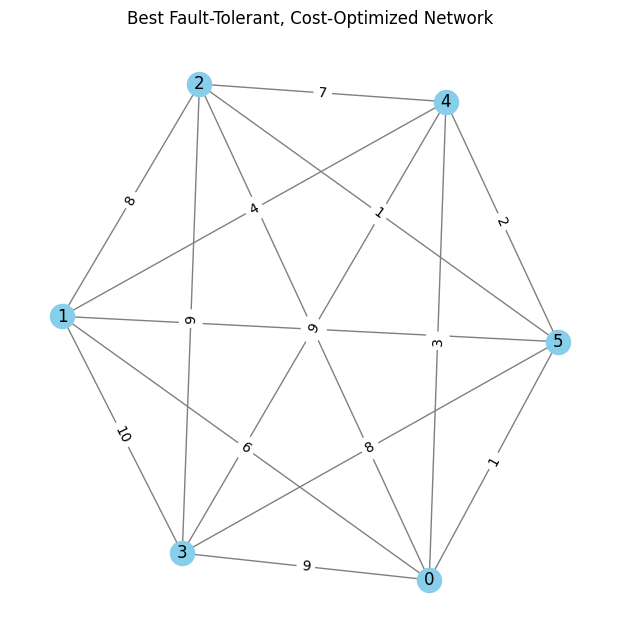

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

NUM_NODES = 6
POP_SIZE = 10
GENS = 50
MUTATION_RATE = 0.2

# Generate all possible edges
all_possible_edges = [(i, j) for i in range(NUM_NODES) for j in range(i+1, NUM_NODES)]

# Assign random cost to each edge
edge_costs = {e: random.randint(1, 10) for e in all_possible_edges}

def generate_chromosome():
    """Create a random connected graph with NUM_NODES"""
    G = nx.Graph()
    G.add_nodes_from(range(NUM_NODES))
    while not nx.is_connected(G):
        edge = random.choice(all_possible_edges)
        G.add_edge(*edge)
    return G

def fitness(G):
    if not nx.is_connected(G):
        return 0
    cost = sum(edge_costs[e] for e in G.edges())
    redundancy = average_node_connectivity(G)
    avg_path_len = nx.average_shortest_path_length(G)
    return (1 / cost) + redundancy + (1 / avg_path_len)

def average_node_connectivity(G):
    """Basic proxy for fault tolerance: average node connectivity"""
    try:
        return nx.average_node_connectivity(G)
    except:
        return 0

def crossover(G1, G2):
    edges1 = list(G1.edges())
    edges2 = list(G2.edges())
    child_edges = list(set(edges1[:len(edges1)//2] + edges2[len(edges2)//2:]))
    child = nx.Graph()
    child.add_nodes_from(range(NUM_NODES))
    child.add_edges_from(child_edges)
    if not nx.is_connected(child):
        child = generate_chromosome()
    return child

def mutate(G):
    if random.random() < MUTATION_RATE:
        new_G = G.copy()
        edge = random.choice(all_possible_edges)
        if edge in new_G.edges():
            new_G.remove_edge(*edge)
        else:
            new_G.add_edge(*edge)
        if nx.is_connected(new_G):
            return new_G
    return G

# GA main loop
population = [generate_chromosome() for _ in range(POP_SIZE)]
best_graph = None
best_fitness = 0

for gen in range(GENS):
    population = sorted(population, key=fitness, reverse=True)
    if fitness(population[0]) > best_fitness:
        best_fitness = fitness(population[0])
        best_graph = population[0]
    new_population = population[:2]  # elite selection
    while len(new_population) < POP_SIZE:
        parent1 = random.choice(population[:5])
        parent2 = random.choice(population[:5])
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
    population = new_population
    print(f"Generation {gen + 1} Best Fitness: {best_fitness:.4f}")

# Visualize the best network
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(best_graph)
nx.draw(best_graph, pos, with_labels=True, node_color='skyblue', edge_color='gray')
labels = {e: edge_costs[e] for e in best_graph.edges()}
nx.draw_networkx_edge_labels(best_graph, pos, edge_labels=labels)
plt.title("Best Fault-Tolerant, Cost-Optimized Network")
plt.show()
